# Sound Processing

In [6]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

### Sine wave
- 진폭(amplitude) A: 위 아래로 움직이는 폭. 소리의 크기로 인식된다.
- 주파수(frequency) ω 또는 f: 진동 속도. 주파수가 높으면 빠르게 진동한다. 소리의 높낮이로 인식된다.
- 위상(phase) ϕ: 사인 함수의 시작 시점. 위상 만큼 출발이 늦어진다. 위상의 차이는 소리의 시간차로 인식된다.

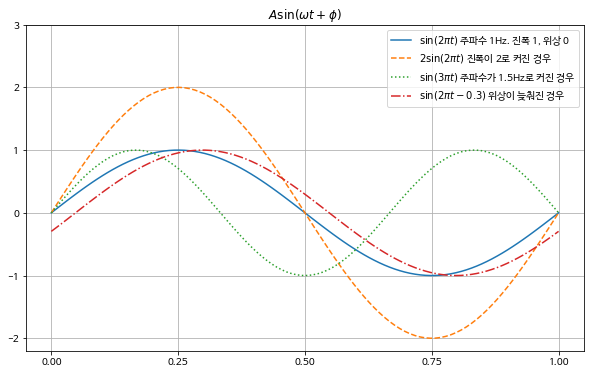

In [4]:
t = np.linspace(0, 1, 100)
plt.figure(figsize=(10,6))
plt.plot(t, 1 * np.sin(2 * np.pi * t + 0), ls="-", label=r"$\sin\left(2\pi{t}\right)$ 주파수 1Hz. 진폭 1, 위상 0")
plt.plot(t, 2 * np.sin(2 * np.pi * t + 0), ls="--", label=r"$2\sin\left(2\pi{t}\right)$ 진폭이 2로 커진 경우 ")
plt.plot(t, 1 * np.sin(3 * np.pi * t + 0), ls=":", label=r"$\sin\left(3\pi{t}\right)$ 주파수가 1.5Hz로 커진 경우")
plt.plot(t, 1 * np.sin(2 * np.pi * t - 0.3), ls="-.", label=r"$\sin\left(2\pi{t} - 0.3\right)$ 위상이 늦춰진 경우")
plt.ylim(-2.2, 3)
plt.xticks(np.linspace(0, 1, 5))
plt.legend(), plt.grid()
plt.title(r"$A\sin\left(\omega{t}+\phi\right)$")
plt.show()

### 싱글 톤(Single tone)

In [5]:
def single_tone(frequecy, sampling_rate=44100, duration=1):
    # frequency: 주파수
    # sampling_rate: 초당 샘플링 데이터 수. 디폴트 44100
    # duration: 지속 시간. 단위 초. 디폴트 1초
    t = np.linspace(0, duration, int(sampling_rate))
    return np.sin(2 * np.pi * frequecy * t)

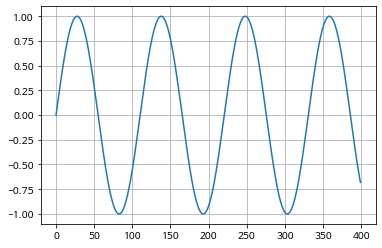

In [6]:
y = single_tone(400)
plt.plot(y[:400]), plt.grid()
plt.show()

In [7]:
from IPython.display import Audio, display
Audio(y, rate=44100)

In [8]:
display(Audio(y, rate=44100))

In [9]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 261.62 * 2**(np.arange(0, len(notes)) / 12.)
notes = list(zip(notes, freqs))
notes

[('C', 261.62),
 ('C#', 277.17673474627884),
 ('D', 293.6585210786982),
 ('D#', 311.1203654270119),
 ('E', 329.6205450734967),
 ('F', 349.2208026479644),
 ('F#', 369.98655218804913),
 ('G', 391.9870974524774),
 ('G#', 415.29586321592035),
 ('A', 439.9906403173536),
 ('A#', 466.1538452797511),
 ('B', 493.87279536756927),
 ('C', 523.24)]

In [10]:
octave = np.hstack([single_tone(f) for f in freqs])
display(Audio(octave, rate=44100))

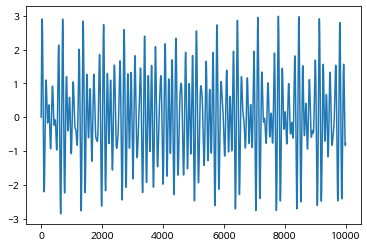

In [11]:
tone_C = single_tone(261.62)
tone_E = single_tone(329.62)
tone_G = single_tone(392)
harmony = tone_C + tone_E + tone_G

plt.plot(harmony[:10000])
plt.show()

In [13]:
Audio(harmony, rate=44100)

### wave 형식 파일

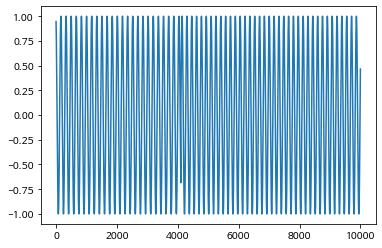

In [14]:
import scipy.io.wavfile

# 초당 샘플링 데이터 수 
sampling_rate = 44100
sp.io.wavfile.write("octave.wav", sampling_rate, octave)

sr, y_read = sp.io.wavfile.read("octave.wav")
# sr == sampling_rate

plt.plot(y_read[40000:50000])
plt.show()

In [15]:
Audio(y_read, rate=sr)

### Dual-tone multi-frequency(DTMF) signaling

In [30]:
dt = {'0':(941,1336), '1':(697,1209), '2':(697,1336), '3':(697,1477), '4':(770,1209),
      '5':(770,1336), '6':(770,1477), '7':(852,1209), '8':(852,1336), '9':(852,1477)}

def dual_tone(num):
    return single_tone(dt[num][0]) + single_tone(dt[num][1])

In [29]:
zero = dual_tone('0')
Audio(zero, rate=sampling_rate)

In [31]:
# 연습 문제 1
phone_sound = []
for num in list('01023456789'):
    phone_sound.append(dual_tone(num))

In [32]:
phone_sound = np.hstack(phone_sound)
Audio(phone_sound, rate=sampling_rate)